## 解决多分类问题
> **<font color='red'>ovo 虽然耗时比较多，但是分类较为准确</font>**

> **scikit-learn中已经封装了多分类函数, 默认multi-class使用ovr方式**

> **scikitlearn中封装了两个类 ，ovo类和ovr类， 解决所有的二分类任务**

<img src='./picture/8-1.png'>
<img src='./picture/8-2.png'>
<img src='./picture/8-3.png'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2] #只做简单的二分类问题
y = iris.target


In [2]:
import sys
sys.path.append('E:\github\ml_practice\ml_python')
from model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

## 采用ovr方式

In [3]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
log_reg.score(X_test, y_test)

0.7

In [5]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) *100)).reshape(1,-1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) *100)).reshape(1, -1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap  = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth = 5, cmap=custom_cmap)

In [8]:
log_reg.score(X_test, y_test)

0.7

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


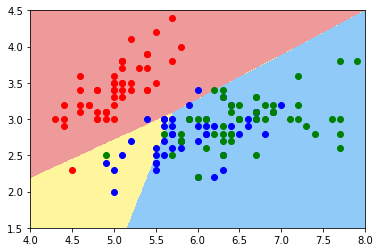

In [9]:
plot_decision_boundary(log_reg, axis=[4, 8, 1.5 , 4.5])
plt.scatter(X[y==0,0] , X[y==0, 1], color='r')
plt.scatter(X[y==1,0] , X[y==1, 1], color='b')
plt.scatter(X[y==2,0] , X[y==2, 1], color='g')
plt.show()


## 采用ovo方式

In [10]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg') #使用ovo方法，需要新的计算方法，牛顿法

In [11]:
log_reg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
log_reg2.score(X_test, y_test)

0.8

D:\software\anaconda\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


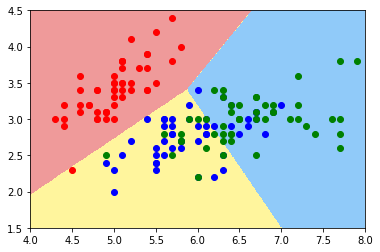

In [15]:
plot_decision_boundary(log_reg2, axis=[4, 8, 1.5 , 4.5])
plt.scatter(X[y==0,0] , X[y==0, 1], color='r')
plt.scatter(X[y==1,0] , X[y==1, 1], color='b')
plt.scatter(X[y==2,0] , X[y==2, 1], color='g')
plt.show()


## 使用所有数据

In [16]:
iris = datasets.load_iris()
X = iris.data #只做简单的二分类问题
y = iris.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

In [18]:

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.9333333333333333

In [19]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg') #使用ovo方法，需要新的计算方法，牛顿法
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

1.0

## ovo 和 ovr 类
> **sklearn中封装了两个类，可以解决不同的二分类问题**

In [21]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train , y_train)
ovr.score(X_test, y_test)

0.9333333333333333

In [22]:
from sklearn.multiclass import OneVsOneClassifier

ovr = OneVsOneClassifier(log_reg)
ovr.fit(X_train , y_train)
ovr.score(X_test, y_test)

1.0